### SML 310: project

This is the code for dataset I

#### Import library


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
import seaborn as sns
import os
%matplotlib inline
np.random.seed(1)

#### Set up a working directory

In [2]:
print(os.getcwd())

from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/
!pwd


/content
Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive


### Check and connect to a GPU

In [4]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.8.0
/device:GPU:0
Num GPUs Available:  1


## Load the data

In [5]:
train = pd.read_csv('/content/drive/My Drive/Sign_Language/Dataset/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/My Drive/Sign_Language/Dataset/sign_mnist_test.csv')


## EDA

In [6]:
#Print the shape of the train and test to see the size
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


- Now,let's print the first 5 rows of the train and test data to check what the data looks like

In [7]:
# print the first 5 rows of the train and test data to check what the data looks like
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


- Now, let's change the label, as the data has J as a label. Thus, now we will only have 24 classes

In [9]:

for i in range(train.shape[0]):
   if train["label"][i]>9:

      train["label"][i]= train["label"][i]-1

for i in range(test.shape[0]):
   if test["label"][i]>9:

      test["label"][i]= test["label"][i]-1


- Let's do the count plot to see the class distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


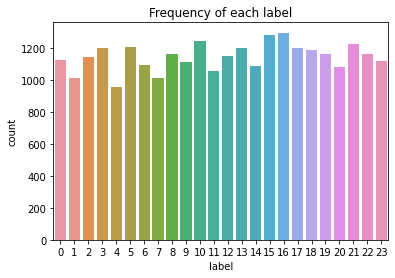

In [10]:
sns.countplot(train["label"])
plt.title("Frequency of each label")
plt.savefig("Class label 24 classes")

- From the above, we can see the class distribution.

- Now, let's Change the data into numpy array

In [11]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')


#Specifying class labels for the 24 classes
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
print(len(class_names))

24


#### Plot sample images from training

- Now, let's plot sample images from the dataset to check the type of the image

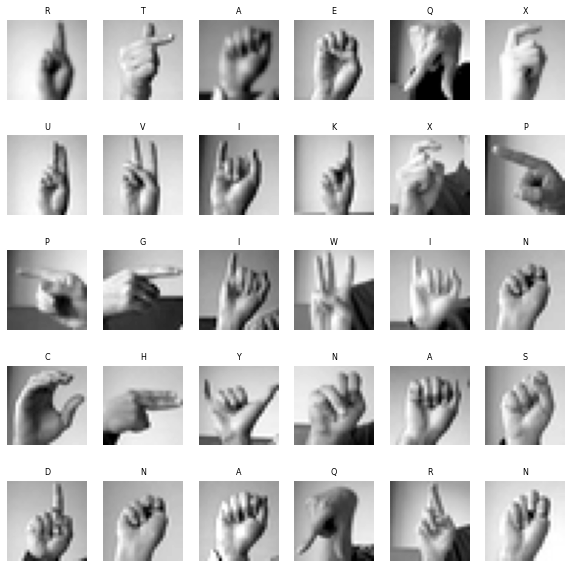

In [12]:

import random
W = 6
L = 5
fig, axes = plt.subplots(L, W, figsize = (10,10))
axes = axes.ravel() 
n_train = len(train_set) 
for i in np.arange(0, W * L):
    # Let's select a random number
    index = np.random.randint(0, n_train)
    axes[i].imshow( train_set[index,1:].reshape((28,28)), cmap='gray')
    label_index = int(train_set[index,0])
    if label_index<=23:
        axes[i].set_title(class_names[label_index], fontsize = 8)
        axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
plt.savefig("Sample training.jpeg")

- The above figure shows sample images from the training set. We can see that the images are in grayscale and their sizes are small.

#### Normalize the data

- Here we divide by 255 to make the pixel values between 0 and 1.

In [57]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

print(X_train.shape)
print(y_train.shape)

(27455, 784)
(27455,)


#### Cross validation

- Here we further split the train set into train and validation. We need validation as we are developing a deep learning model, we use it to monitor the performance during hyperparameter tunning.

In [58]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)


print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(21964, 784)
(21964,)
(5491, 784)
(5491,)


- Here we are using again 20% of the training data as a validation data.

- Now, let's unpack the data

In [59]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


- Now, the data is ready to train the conolutional neural network.

## Convolutional Neural Network

In [65]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import scipy.misc
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from keras.applications.resnet_v2 import ResNet152V2



#### Data Augumentation

In [17]:
#adapted from https://www.tensorflow.org/tutorials/images/data_augmentation
def random_invert_img(x, p=0.5):
    if  tf.random.uniform([]) < p:
        x = (255-x)
    else:
        x
    return x


def random_invert(factor=0.5):
    return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()


class RandomInvert(layers.Layer):
    def __init__(self, factor=0.5, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor

    def call(self, x):
        return random_invert_img(x)

In [18]:
def random_change_bright_img(x):
    return tf.image.random_brightness(x, 0.2)

def random_change_brightness():
    return layers.Lambda(lambda x: random_change_bright_img(x))

random_change_brightness = random_change_brightness()


class RandomBrightness(layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, x):
        return random_change_brightness (x)

In [19]:
def data_augmenter():
    '''
    Sequential model composed of 2 layers
    '''
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomRotation(0.2)) 
    return data_augmentation

In [20]:
def data_augmenter2():
    '''
    Sequential model composed of 2 layers
    '''
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal_and_vertical"))
    data_augmentation.add(RandomRotation(0.2)) 
    data_augmentation.add(RandomInvert())
    return data_augmentation

In [21]:
def data_augmenter3():
    '''
    Sequential model composed of 2 layers
    '''
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomRotation(0.2)) 
    data_augmentation.add(RandomBrightness())
    return data_augmentation

In [22]:
def data_augmenter4():
    '''
    Sequential model composed of 2 layers
    '''
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomRotation(0.2)) 
    data_augmentation.add(RandomBrightness())
    data_augmentation.add(RandomContrast(0.2))
    return data_augmentation

In [23]:
def data_augmenter5():
    '''
    Sequential model composed of 2 layers
    '''
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomRotation(0.2)) 
    data_augmentation.add(RandomBrightness())
    data_augmentation.add(RandomCrop(20,20))
    data_augmentation.add(Resizing(28, 28, interpolation='bilinear', crop_to_aspect_ratio=True)) #resize to 28 x 28

    return data_augmentation

In [24]:
def data_augmenter6():
    '''
    Sequential model composed of 2 layers
    '''
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomRotation(0.4)) 
    data_augmentation.add(RandomBrightness())
    return data_augmentation

- Now, let's build the building block of the Sign_LanguageNet.

In [34]:
def Sign_LanguageNet_identity_block(X, kernel_size, train_filters, training=True, initializer="HeNormal"):
    filter_1, filter_2, filter_3 = train_filters # these are filters
    residual = X
    #here let's define the conv blocks
    X = Conv2D(filters = filter_1, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer)(X)
    X = BatchNormalization(axis = 3)(X, training = training) 
    X = Activation('relu')(X)
    # this is the second CONV block
    X = Conv2D(filters = filter_2, kernel_size = kernel_size,strides = (1, 1),padding='same',kernel_initializer = initializer)(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X)
    # this is the third CONV block
    X = Conv2D(filters = filter_3, kernel_size = 1, strides = (1, 1), padding='valid', kernel_initializer = initializer)(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    # let's add the residue to X   
    X = Add()([residual,X])
    # finally let's pass it to an activation fucntion- Relu
    X = Activation('relu')(X)
    return X
def Sign_LanguageNet_convolutional_block(X, kernel, train_filters, stride = 2, training=True, initializer="HeNormal"):
    filter_1, filter_2, filter_3 = train_filters # these are filters
    #temporary/shortcut
    X_temp = X
    # First component
    X = Conv2D(filters = filter_1, kernel_size = 1, strides = (stride, stride), padding='valid', kernel_initializer = initializer)(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X)
    # this is the second CONV block
    X = Conv2D(filters = filter_2, kernel_size = kernel,strides = (1, 1),padding='same',kernel_initializer = initializer)(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X)
    # this is the third CONV block
    X = Conv2D(filters = filter_3, kernel_size = 1, strides = (1, 1), padding='valid', kernel_initializer = initializer)(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    #This is a skip path
    X_temp = Conv2D(filters = filter_3, kernel_size = 1, strides = (stride, stride), padding='valid', kernel_initializer = initializer)(X_temp)
    X_temp = BatchNormalization(axis = 3)(X_temp, training=training)
    # let's add the residue to X_temp  
    X = Add()([X, X_temp])
    # finally let's pass it to an activation fucntion- Relu
    X = Activation('relu')(X)
    return X
# Now, let's define the main model
def Sign_LanguageNet(input_shape = (28, 28, 1), classes = 24):
    input = Input(input_shape)
    #This is for augumnetatation
    #X=data_augmenter3()(input) 
    X = ZeroPadding2D((7,7))(input)   # Zero-Padding
    X = Conv2D(64, (5, 5), strides = (2, 2), kernel_initializer = "HeNormal")(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    X = Sign_LanguageNet_convolutional_block(X, 3,[64, 64, 256], stride = 1)
    X = Sign_LanguageNet_identity_block(X, 3, [64, 64, 256])
    X = Sign_LanguageNet_identity_block(X, 3, [64, 64, 256])
    X = Sign_LanguageNet_identity_block(X, 3, [64, 64, 256])
    X = Sign_LanguageNet_identity_block(X, 3, [64, 64, 256])
    X = Sign_LanguageNet_convolutional_block(X, 3,[128,128,512], stride = 2)
    X = Sign_LanguageNet_identity_block(X, 3,  [128,128,512])
    X = Sign_LanguageNet_identity_block(X, 3,  [128,128,512])
    X = Sign_LanguageNet_identity_block(X, 3,  [128,128,512])
    X = Sign_LanguageNet_identity_block(X, 3,  [128,128,512])
    X = Sign_LanguageNet_convolutional_block(X, 3,[256, 256, 1024], stride = 2)
    X = Sign_LanguageNet_identity_block(X, 3, [256, 256, 1024])
    X = Sign_LanguageNet_identity_block(X, 3, [256, 256, 1024])
    X = Sign_LanguageNet_identity_block(X, 3, [256, 256, 1024])
    X = Sign_LanguageNet_identity_block(X, 3, [256, 256, 1024])
    X = Sign_LanguageNet_identity_block(X, 3, [256, 256, 1024])
    X = Sign_LanguageNet_identity_block(X, 3, [256, 256, 1024])
    X = Sign_LanguageNet_convolutional_block(X, 3, [512, 512, 2048], stride = 2)
    X = Sign_LanguageNet_identity_block(X, 3, [512, 512, 2048])
    X = Sign_LanguageNet_identity_block(X, 3, [512, 512, 2048])
    X = Sign_LanguageNet_identity_block(X, 3, [512, 512, 2048])
    X = AveragePooling2D((2, 2))(X) ## now, lets add a pooling layer
    X=Dropout(0.25)(X) # dropout
    X = Flatten()(X)
    X= Dense(256, activation='relu',kernel_initializer = "HeNormal")(X)
    X=Dropout(0.25)(X)
    X= Dense(128, activation='relu',kernel_initializer = "HeNormal")(X)
    X= Dropout(0.3)(X)
    X = Dense(classes, activation='softmax', kernel_initializer = "HeNormal")(X)
    model = Model(inputs = input, outputs = X)
    return model

#### Model Summary

In [35]:
model = Sign_LanguageNet(input_shape = (28, 28, 1), classes = 24)



- Let's print out the model summary

In [36]:
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 42, 42, 1)   0           ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_69 (Conv2D)             (None, 19, 19, 64)   1664        ['zero_padding2d_3[0][0]']       
                                                                                                  
 batch_normalization_69 (BatchN  (None, 19, 19, 64)  256         ['conv2d_69[0][0]']        

### Compile the model

#### Optimizer

In [37]:
### Adam
adam=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

## RMSprop
rms=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07)
## SGD
SGD=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)

#### Loss

In [38]:

### SparseCategoricalCrossentropy Loss
loss_1=keras.losses.SparseCategoricalCrossentropy(from_logits=False)


#### Model Compile

In [39]:
model.compile(
    loss=loss_1,
    optimizer=adam,
    metrics=["accuracy"],
)

### Fit the model

In [ ]:
%time
#Training the CNN model
history = model.fit(X_train,
                    y_train,
                    batch_size = 256,
                    epochs = 70,
                    verbose = 1,
                    validation_data = (X_validate, y_validate),
                )

### Visualizing the Training Performance

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.savefig("Train Accuracy")

#### Train and Test Accuracy

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

#### Prediction for test data and test time augumentation


- Test-time augmentation for each image augment it 5 ways, and pass each augmented image through the network.
- The prediction for the original image will be the mean of the predictions for the 5 augnmented images 

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])



probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

# this is for test time augumentation only
test_temp = X_test
preds_list = []
X_test1 = RandomBrightness()(test_temp)
X_test1 = RandomFlip("horizontal")(X_test1)
X_test1 = RandomRotation(0.2)(X_test1)
preds1 = list(probability_model.predict(X_test1))
preds_list.append(preds1)
X_test2 = RandomBrightness()(test_temp)
X_test2 = RandomFlip("horizontal")(X_test2)
X_test2 = RandomRotation(0.2)(X_test2)
preds2 = list(probability_model.predict(X_test2))
preds_list.append(preds2)
X_test3 = RandomBrightness()(test_temp)
X_test3 = RandomFlip("horizontal")(X_test3)
X_test3 = RandomRotation(0.2)(X_test3)
preds3 = list(probability_model.predict(X_test3))
preds_list.append(preds3)
X_test4 = RandomBrightness()(test_temp)
X_test4 = RandomFlip("horizontal")(X_test4)
X_test4 = RandomRotation(0.2)(X_test4)
preds4 = probability_model.predict(X_test4)
preds_list.append(preds4)
X_test5 = RandomBrightness()(test_temp)
X_test5 = RandomFlip("horizontal")(X_test5)
X_test5 = RandomRotation(0.2)(X_test5)
preds5 = probability_model.predict(X_test5)
preds_list.append(preds5)
predicted_classes = np.mean(preds_list, axis=0)
pred_class = list(np.argmax(predicted_classes, axis=-1))


#### Visualize the actual and predcited signs

In [39]:
#Visualize predictions
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Prediction Class = {pred_class[i]}\n True Class = {y_test[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

### Error Calculation for Test Data

In [ ]:
total_test_cases = len(y_test)
total_correctly_classified = 0
total_misclassified = 0
for i in range(y_test.shape[0]):
    if y_test[i] == pred_class[i]:
        total_correctly_classified += 1
    else:
        total_misclassified += 1
test_accuracy = (total_correctly_classified / total_test_cases) * 100
test_error_rate = (total_misclassified / total_test_cases) * 100

print('Test accuracy (%):', test_accuracy)
print('Test error rate (%):', test_error_rate)
print('Number of misclassified classes:', total_misclassified)
print('Number of correctly classified classes', total_correctly_classified)

### Precision and Recall

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

cm = metrics.confusion_matrix(y_test, pred_class)
print(metrics.classification_report(y_test, pred_class))

### Confusion Matrice

In [ ]:
# code adapted from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test,pred_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(24, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix')
plt.show()

### Transfer Learning

In [70]:
X_train= tf.image.resize(X_test, [224,224], preserve_aspect_ratio = True)
X_train = tf.image.grayscale_to_rgb(X_train)
X_test = tf.image.resize(X_test, [224,224], preserve_aspect_ratio = True)
X_test = tf.image.grayscale_to_rgb(X_test)
X_validate = tf.image.resize(X_validate, [224,224], preserve_aspect_ratio = True)
X_validate = tf.image.grayscale_to_rgb(X_validate)

- Here I tried different pretrained models.

- I tested ImageNet/MNIST

In [70]:
# VGG19
base_model = tf.keras.applications.vgg19.VGG19(input_shape=(224, 224, 3),
                                               include_top=False,weights='imagenet')
# freeze the layers onn the base network
base_model.trainable = False

# model = InceptionV3(weights='imagenet', include_top=False, input_shape=(229, 229, 3),pooling='avg')
# base_model.trainable = False


# base_model= EfficientNetB7(weights='imagenet', include_top=False, input_shape=(600, 600, 3),pooling='avg')    # re-structure the model
# base_model.trainable = False


# #ResNet152
# base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3),pooling='avg')
# base_model.trainable = False


# base_model = tf.keras.applications.MobileNet(input_shape=(224, 224, 3),
#                                               include_top=False,
#                                               weights='imagenet',pooling='avg')

# for layer in base_model.layers:
#     layer.trainable=False

In [68]:
inputs = tf.keras.Input(shape=(224,224, 3))
X = preprocess_input(inputs)
X = base_model(X, training=False)
X = Flatten()(X)
X= Dense(256, activation='relu',kernel_initializer = "HeNormal")(X)
X=Dropout(0.25)(X)
X= Dense(128, activation='relu',kernel_initializer = "HeNormal")(X)
X= Dropout(0.3)(X)
X = Dense(24, activation='softmax', kernel_initializer = "HeNormal")(X)


model = tf.keras.Model(inputs, outputs = X)

In [69]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 256)               6422

In [ ]:
# learning rate is set to 0.001 in adam
### SparseCategoricalCrossentropy Loss
loss_1=keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(
    loss=loss_1,
    optimizer=adam,
    metrics=["accuracy"],
)

In [ ]:
history2 = model.fit(X_train,
                    y_train,
                    batch_size = 256,
                    epochs = 30,
                    verbose = 1,
                    validation_data = (X_validate, y_validate))

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.savefig("Train Accuracy")

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)